In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("titanic.xlsx")

In [3]:
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = data.copy()

In [5]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.drop(["Unnamed: 0"] ,axis=1 ,inplace = True)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data assessing 

## Qyality Issue

1. **Name** - There is another name of all female
2. **Age** - There is mising value in age column
3. **Fare** - calculate single person price
4. **Cabin** - There is missing value in Cabin
5. **Embarked** - there is 2 missing value


### Tidiness Issues

1. **Name** - Can Split into two column name surname and tag
2. **SibSp & Parch** - calculate total member

In [8]:
df["Survived"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.insert(3,"surname",df["Name"].str.strip().str.split(",").str.get(0))

In [11]:
df.head()

,PassengerId,Survived,Pclass,surname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.insert(4,"title",df["Name"].str.strip().str.split(",").str.get(1).str.split(".").str.get(0))

In [13]:
df.head()

,PassengerId,Survived,Pclass,surname,title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.insert(5,"name",df["Name"].str.strip().str.split(",").str.get(1).str.split(".").str.get(1))

In [15]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs,John Bradley (Florence Briggs Thayer),"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs,Jacques Heath (Lily May Peel),"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.drop(["Name"],axis=1,inplace=True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs,John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs,Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
def remove_extra(st):
    for i in st:
        if i == "(" or i == '"':
            index = st.index(i)
            return st[0:index]
    return st

In [19]:
remove_extra('this is "erger" hj')

'this is '

In [20]:
df["name"] = df["name"].apply(remove_extra)

In [21]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.insert(10,"total_member",df["SibSp"] + df["Parch"] + 1)

In [23]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,113803,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,373450,8.0500,NaN,S


In [24]:
df.insert(12,"single_price",df["Fare"]/df["total_member"])

In [25]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,A/5 21171,3.62500,7.2500,NaN,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,STON/O2. 3101282,7.92500,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,373450,8.05000,8.0500,NaN,S


In [26]:
df["Cabin"].isnull().sum()

687

In [27]:
df["Cabin"].fillna("no info" , inplace=True)

C:\Users\jayde\AppData\Local\Temp\ipykernel_14788\4126208229.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cabin"].fillna("no info" , inplace=True)


In [28]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,A/5 21171,3.62500,7.2500,no info,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,STON/O2. 3101282,7.92500,7.9250,no info,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,373450,8.05000,8.0500,no info,S


In [29]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,Ticket,single_price,Fare,Cabin,Embarked
61,62,1,1,Icard,Miss,Amelie,female,38.0,0,0,1,113572,80.0,80.0,B28,NaN
829,830,1,1,Stone,Mrs,George Nelson,female,62.0,0,0,1,113572,80.0,80.0,B28,NaN


In [30]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [31]:
df[df["Cabin"].str.contains("B")]

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,Ticket,single_price,Fare,Cabin,Embarked
31,32,1,1,Spencer,Mrs,William Augustus,female,NaN,1,0,2,PC 17569,73.260400,146.5208,B78,C
54,55,0,1,Ostby,Mr,Engelhart Cornelius,male,65.0,0,1,2,113509,30.989600,61.9792,B30,C
61,62,1,1,Icard,Miss,Amelie,female,38.0,0,0,1,113572,80.000000,80.0000,B28,NaN
118,119,0,1,Baxter,Mr,Quigg Edmond,male,24.0,0,1,2,PC 17558,123.760400,247.5208,B58 B60,C
139,140,0,1,Giglio,Mr,Victor,male,24.0,0,0,1,PC 17593,79.200000,79.2000,B86,C
170,171,0,1,Van der hoef,Mr,Wyckoff,male,61.0,0,0,1,111240,33.500000,33.5000,B19,S
194,195,1,1,Brown,Mrs,James Joseph,female,44.0,0,0,1,PC 17610,27.720800,27.7208,B4,C
195,196,1,1,Lurette,Miss,Elise,female,58.0,0,0,1,PC 17569,146.520800,146.5208,B80,C
257,258,1,1,Cherry,Miss,Gladys,female,30.0,0,0,1,110152,86.500000,86.5000,B77,S
263,264,0,1,Harrison,Mr,William,male,40.0,0,0,1,112059,0.000000,0.0000,B94,S


In [32]:
df["Embarked"].fillna("S" , inplace=True)

C:\Users\jayde\AppData\Local\Temp\ipykernel_14788\163526218.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna("S" , inplace=True)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   surname       891 non-null    object 
 4   title         891 non-null    object 
 5   name          891 non-null    object 
 6   Sex           891 non-null    object 
 7   Age           714 non-null    float64
 8   SibSp         891 non-null    int64  
 9   Parch         891 non-null    int64  
 10  total_member  891 non-null    int64  
 11  Ticket        891 non-null    object 
 12  single_price  891 non-null    float64
 13  Fare          891 non-null    float64
 14  Cabin         891 non-null    object 
 15  Embarked      891 non-null    object 
dtypes: float64(3), int64(6), object(7)
memory usage: 111.5+ KB


In [34]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,A/5 21171,3.62500,7.2500,no info,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,STON/O2. 3101282,7.92500,7.9250,no info,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,373450,8.05000,8.0500,no info,S


In [35]:
df[["Survived","Pclass","Age","SibSp","Parch","Fare"]].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [36]:
df["Age"].median()

28.0

### EDA

### Univariate Analysis 

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


### Age

- 38 % normaliy distributedd
- 24 % value is missing
- there is much outliers

In [37]:
df["Age"].mean()

29.69911764705882

In [38]:
df["Age"].median()

28.0

In [39]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [40]:
df["Age"].value_counts().sum()

714

In [41]:
df["Age"].isnull().sum()

177

<Axes: ylabel='Density'>

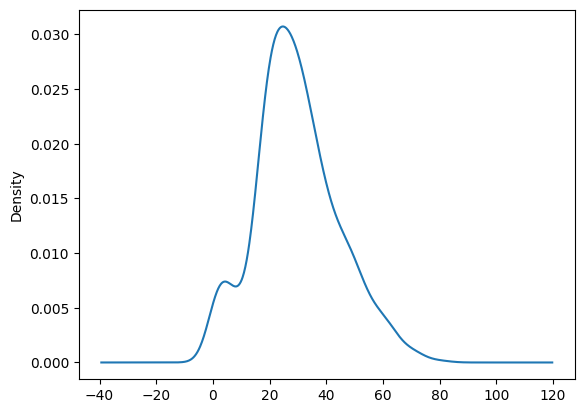

In [42]:
df["Age"].plot(kind="kde")

In [43]:
df[df["Age"] == 0.420000]

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,Ticket,single_price,Fare,Cabin,Embarked
803,804,1,3,Thomas,Master,Assad Alexander,male,0.42,0,1,2,2625,4.25835,8.5167,no info,C


In [44]:
df["Age"].skew()

0.38910778230082704

In [45]:
df[(df["Age"] < 20) | (df["Age"] > 40)]["Age"].mean()

30.651815286624203

<Axes: ylabel='Frequency'>

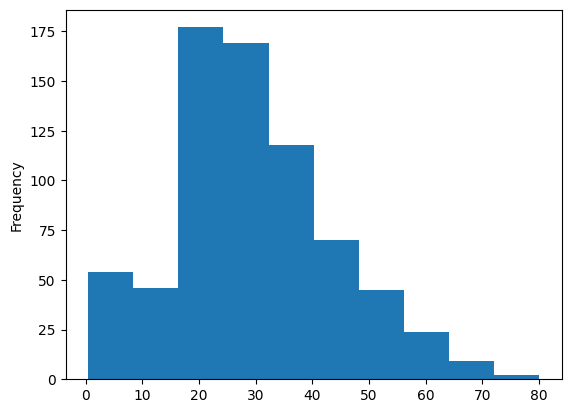

In [46]:
df["Age"].plot(kind="hist")

In [47]:
((df["Age"].isnull().sum())/ df["Age"].value_counts().sum())*100

24.789915966386555

In [48]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,A/5 21171,3.62500,7.2500,no info,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,STON/O2. 3101282,7.92500,7.9250,no info,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,373450,8.05000,8.0500,no info,S


### total_member

- there is some outliers
- positivily normal distribution

In [49]:
df["total_member"].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: total_member, dtype: float64

<Axes: ylabel='Density'>

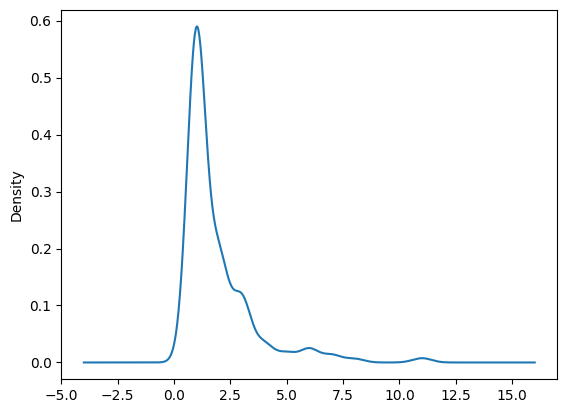

In [50]:
df["total_member"].plot(kind="kde")

In [51]:
df["total_member"].skew()

2.7274414739308535

<Axes: ylabel='Frequency'>

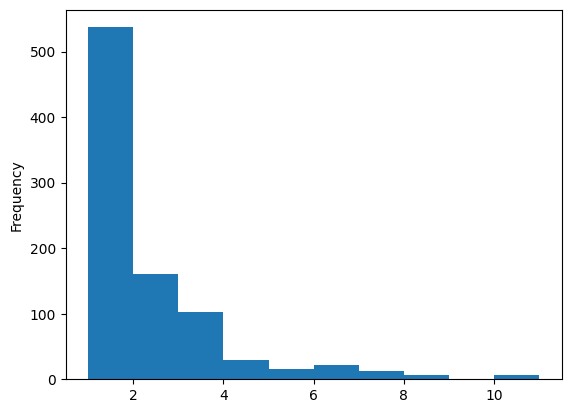

In [52]:
df["total_member"].plot(kind="hist")

<Axes: >

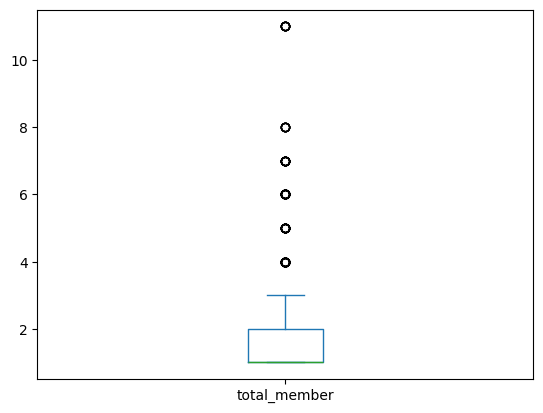

In [53]:
df["total_member"].plot(kind="box")

In [54]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,A/5 21171,3.62500,7.2500,no info,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,STON/O2. 3101282,7.92500,7.9250,no info,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,373450,8.05000,8.0500,no info,S


### single_price

- there is 24 % outliers
- positivily normal(2.75) distribution

In [55]:
df["single_price"].describe()

count    891.000000
mean      19.916375
std       35.841257
min        0.000000
25%        7.250000
50%        8.300000
75%       23.666667
max      512.329200
Name: single_price, dtype: float64

<Axes: ylabel='Density'>

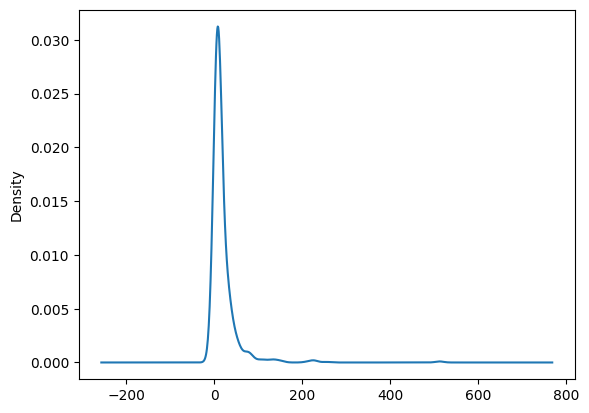

In [56]:
df["single_price"].plot(kind="kde")

In [57]:
df["single_price"].skew()

7.765594881854595

<Axes: >

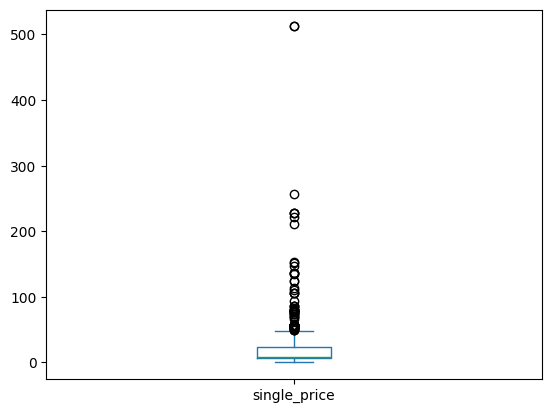

In [58]:
df["single_price"].plot(kind="box")

In [59]:
df[(df["single_price"] <= 7) | (df["single_price"] <= 23)]

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,A/5 21171,3.625000,7.2500,no info,S
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,STON/O2. 3101282,7.925000,7.9250,no info,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,373450,8.050000,8.0500,no info,S
5,6,0,3,Moran,Mr,James,male,NaN,0,0,1,330877,8.458300,8.4583,no info,Q
7,8,0,3,Palsson,Master,Gosta Leonard,male,2.0,3,1,5,349909,4.215000,21.0750,no info,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,Sutehall,Mr,Henry Jr,male,25.0,0,0,1,SOTON/OQ 392076,7.050000,7.0500,no info,S
885,886,0,3,Rice,Mrs,William,female,39.0,0,5,6,382652,4.854167,29.1250,no info,Q
886,887,0,2,Montvila,Rev,Juozas,male,27.0,0,0,1,211536,13.000000,13.0000,no info,S
888,889,0,3,Johnston,Miss,Catherine Helen,female,NaN,1,2,4,W./C. 6607,5.862500,23.4500,no info,S


In [60]:
df[(df["single_price"] <= 7) | (df["single_price"] <= 23)]["single_price"].mean()

8.348795814170836

In [61]:
((891 - 667) / 891)*100

25.140291806958476

<Axes: ylabel='Frequency'>

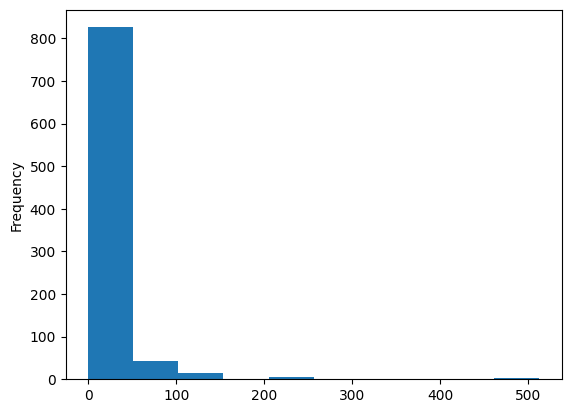

In [62]:
df["single_price"].plot(kind="hist")

In [63]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,A/5 21171,3.62500,7.2500,no info,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,STON/O2. 3101282,7.92500,7.9250,no info,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,373450,8.05000,8.0500,no info,S


### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

### Survived



In [64]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

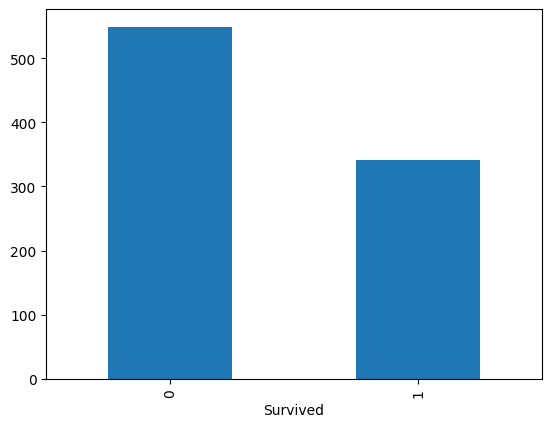

In [65]:
df["Survived"].value_counts().plot(kind="bar")

In [66]:
df.insert(11,"is_alone",df["total_member"] == 1)

In [67]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,is_alone,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,False,A/5 21171,3.62500,7.2500,no info,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,False,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,True,STON/O2. 3101282,7.92500,7.9250,no info,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,False,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,True,373450,8.05000,8.0500,no info,S


In [68]:
df["title"].value_counts()

title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [70]:
df["title"].value_counts()

title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

<Axes: ylabel='count'>

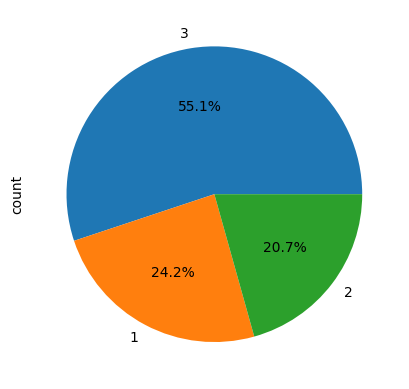

In [71]:
df["Pclass"].value_counts().plot(kind="pie",autopct="%0.1f%%")

<Axes: ylabel='count'>

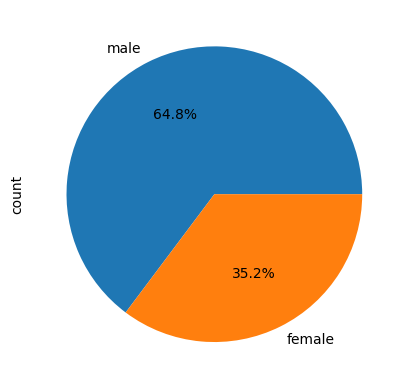

In [72]:
df["Sex"].value_counts().plot(kind="pie" , autopct="%0.1f%%")

<Axes: ylabel='count'>

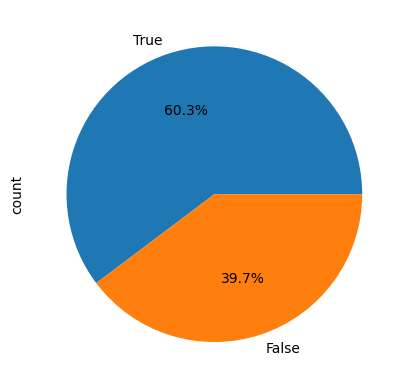

In [73]:
df["is_alone"].value_counts().plot(kind="pie" , autopct = "%0.1f%%")

In [74]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,is_alone,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,False,A/5 21171,3.62500,7.2500,no info,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,False,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,True,STON/O2. 3101282,7.92500,7.9250,no info,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,False,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,True,373450,8.05000,8.0500,no info,S


<Axes: ylabel='count'>

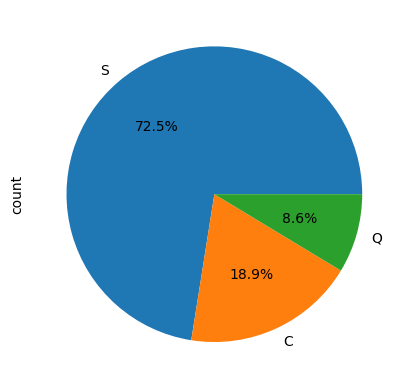

In [75]:
df["Embarked"].value_counts().plot(kind = "pie" , autopct = "%0.1f%%")

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

In [76]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,is_alone,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,False,A/5 21171,3.62500,7.2500,no info,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,False,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,True,STON/O2. 3101282,7.92500,7.9250,no info,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,False,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,True,373450,8.05000,8.0500,no info,S


In [77]:
df[["Age","single_price"]].corr()

,Age,single_price
Age,1.000000,0.150763
single_price,0.150763,1.000000


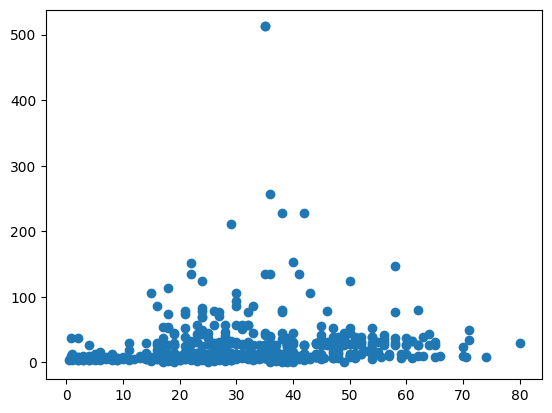

In [78]:
plt.scatter(x = df["Age"] , y = df["single_price"])

<Axes: ylabel='Density'>

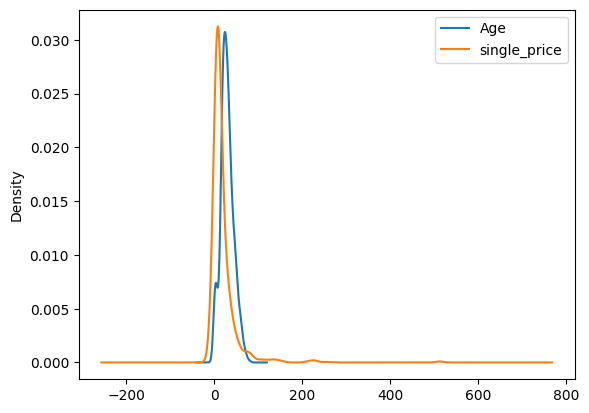

In [79]:
df[["Age","single_price"]].plot(kind="kde")

In [80]:
df[["Age","single_price"]].skew()

Age             0.389108
single_price    7.765595
dtype: float64

In [81]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,is_alone,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,False,A/5 21171,3.62500,7.2500,no info,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,False,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,True,STON/O2. 3101282,7.92500,7.9250,no info,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,False,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,True,373450,8.05000,8.0500,no info,S


<Axes: ylabel='Density'>

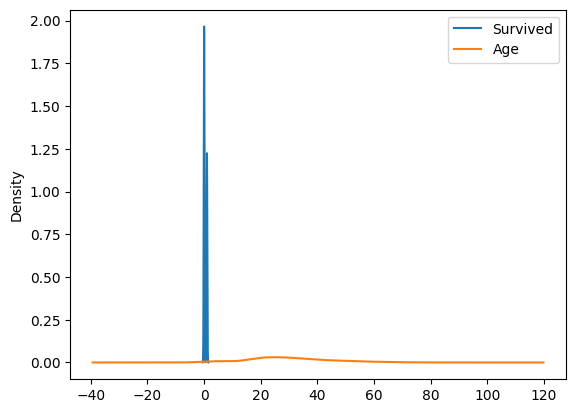

In [82]:
df[["Survived" , "Age"]].plot(kind="kde")

In [83]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,is_alone,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,False,A/5 21171,3.62500,7.2500,no info,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,False,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,True,STON/O2. 3101282,7.92500,7.9250,no info,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,False,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,True,373450,8.05000,8.0500,no info,S


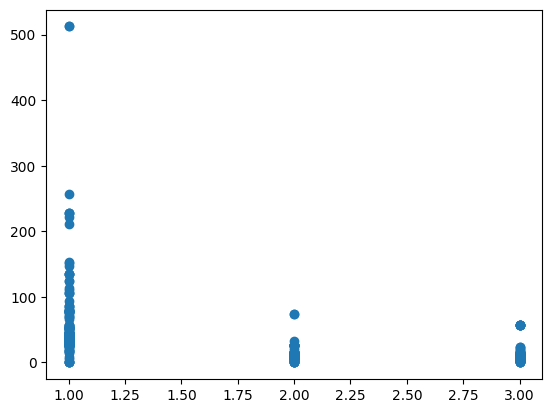

In [84]:
plt.scatter(x = df["Pclass"] , y = df["single_price"])

In [85]:
df[["Pclass" , "single_price"]].corr()

,Pclass,single_price
Pclass,1.000000,-0.485079
single_price,-0.485079,1.000000


### Categorical - Categorical (Survived , Pclass)

**conclusion**

- for high class servival chance is high

In [86]:
pd.crosstab(df["Survived"] , df["Pclass"] , normalize = "columns")* 100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

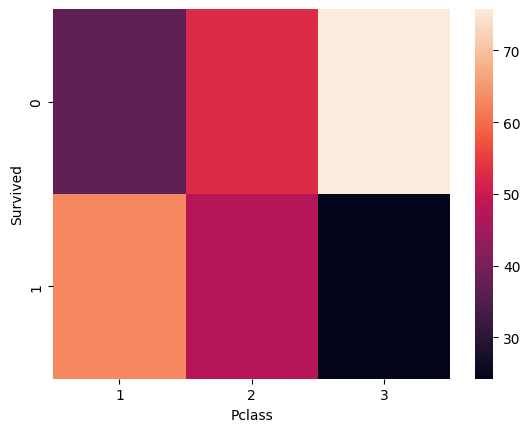

In [87]:
sns.heatmap(pd.crosstab(df["Survived"] , df["Pclass"] , normalize = "columns")* 100)

In [88]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,is_alone,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,False,A/5 21171,3.62500,7.2500,no info,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,False,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,True,STON/O2. 3101282,7.92500,7.9250,no info,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,False,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,True,373450,8.05000,8.0500,no info,S


### Categorical - Categorical (Survived , Sex)

**conclusion**

- for Female servival chance is high

In [89]:
pd.crosstab(df["Survived"] , df["Sex"] , normalize = "columns")*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

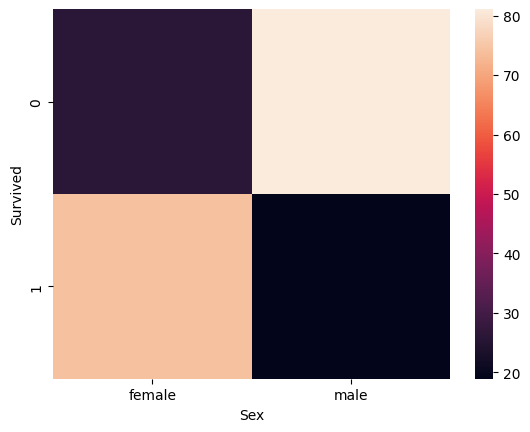

In [90]:
sns.heatmap(pd.crosstab(df["Survived"] , df["Sex"] , normalize = "columns")*100)

### Categorical - Categorical (Sex , Pclass)

**conclusion**

- Female is high in class 3 compare to other 2 classes

In [91]:
pd.crosstab(df["Pclass"] , df["Sex"] , normalize = "columns")*100

Sex,female,male
Pclass,,
1,29.936306,21.143847
2,24.203822,18.717504
3,45.859873,60.138648


<Axes: xlabel='Sex', ylabel='Pclass'>

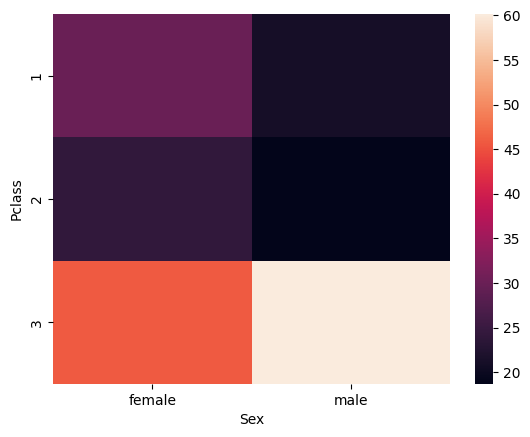

In [131]:
sns.heatmap(pd.crosstab(df["Pclass"] , df["Sex"] , normalize = "columns")*100)

### Categorical - Categorical (Survived , is_alone)

**conclusion**

- for alone person survived chance is low

In [92]:
pd.crosstab(df["Survived"] , df["is_alone"] , normalize = "columns")*100

is_alone,False,True
Survived,,
0,49.435028,69.646182
1,50.564972,30.353818


<Axes: xlabel='is_alone', ylabel='Survived'>

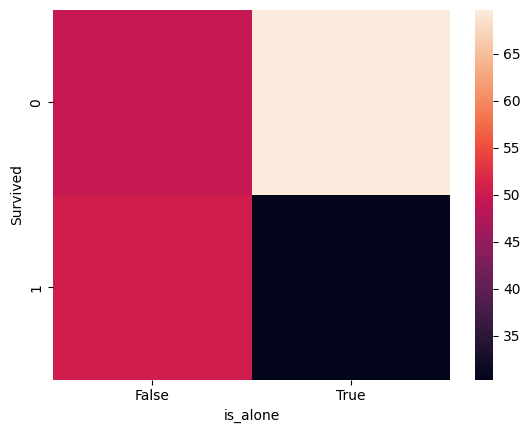

In [132]:
sns.heatmap(pd.crosstab(df["Survived"] , df["is_alone"] , normalize = "columns")*100)

In [93]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,is_alone,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,False,A/5 21171,3.62500,7.2500,no info,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,False,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,True,STON/O2. 3101282,7.92500,7.9250,no info,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,False,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,True,373450,8.05000,8.0500,no info,S


### Categorical - Categorical (Pclass , is_alone)

**conclusion**

- Most of alone person is in class 3

In [94]:
pd.crosstab(df["Pclass"] , df["is_alone"] , normalize = "columns")*100

is_alone,False,True
Pclass,,
1,30.225989,20.297952
2,22.598870,19.366853
3,47.175141,60.335196


<Axes: xlabel='is_alone', ylabel='Pclass'>

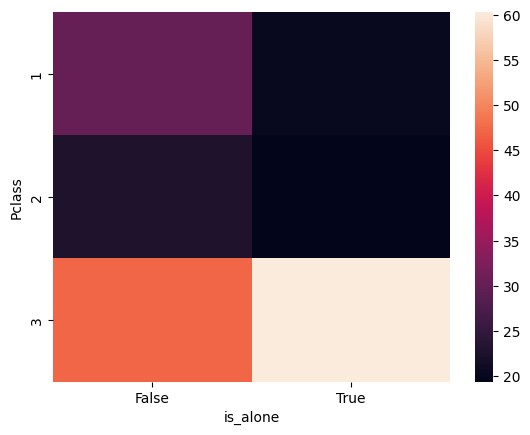

In [133]:
sns.heatmap(pd.crosstab(df["Pclass"] , df["is_alone"] , normalize = "columns")*100)

In [95]:
pd.crosstab(df["Pclass"] , df["Embarked"] , normalize = "columns")*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.969040
2,10.119048,3.896104,25.386997
3,39.285714,93.506494,54.643963


<Axes: xlabel='Embarked', ylabel='Pclass'>

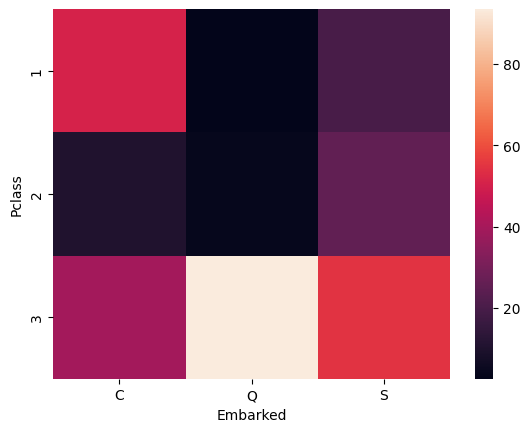

In [134]:
sns.heatmap(pd.crosstab(df["Pclass"] , df["Embarked"] , normalize = "columns")*100)

In [96]:
df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [97]:
pd.crosstab(df["Survived"] , df["Embarked"] , normalize = "columns")*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.099071
1,55.357143,38.961039,33.900929


<Axes: xlabel='Embarked', ylabel='Survived'>

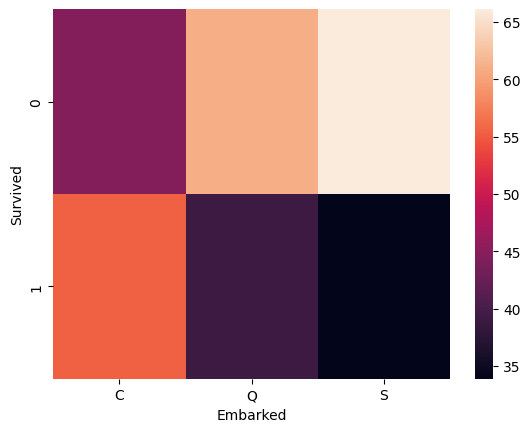

In [135]:
sns.heatmap(pd.crosstab(df["Survived"] , df["Embarked"] , normalize = "columns")*100)

In [98]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,is_alone,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,False,A/5 21171,3.62500,7.2500,no info,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,False,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,True,STON/O2. 3101282,7.92500,7.9250,no info,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,False,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,True,373450,8.05000,8.0500,no info,S


In [105]:
pd.crosstab(df["Survived"] , df["Pclass"]  , normalize = "columns")

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


<Axes: >

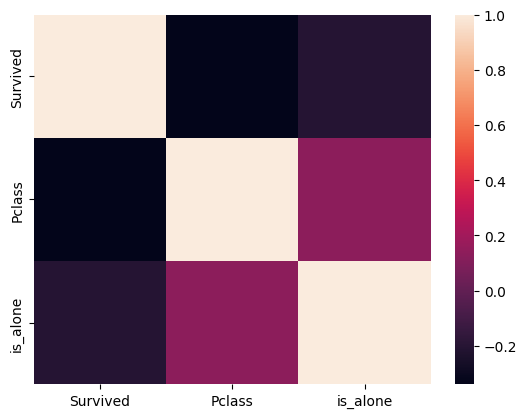

In [110]:
sns.heatmap( df[["Survived" , "Pclass" , "is_alone"]].corr() )

In [137]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,is_alone,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,False,A/5 21171,3.62500,7.2500,no info,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,False,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,True,STON/O2. 3101282,7.92500,7.9250,no info,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,False,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,True,373450,8.05000,8.0500,no info,S


### Hypothesis Testing

### 1) Does gender effect survival rate
### Chi-Square Test: Survival vs. Gender

In [140]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Survived'], df['Sex'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(chi2, p, dof, expected)
if p < 0.05:
    print("Reject the null hypothesis: Survival depends on gender.")
else:
    print("Fail to reject the null hypothesis: Survival is independent of gender.")

260.71702016732104 1.1973570627755645e-58 1 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]
Reject the null hypothesis: Survival depends on gender.


In [139]:
contingency_table

Sex,female,male
Survived,,
0,81,468
1,233,109


In [141]:
df.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,is_alone,Ticket,single_price,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,False,A/5 21171,3.62500,7.2500,no info,S
1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,False,PC 17599,35.64165,71.2833,C85,C
2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,True,STON/O2. 3101282,7.92500,7.9250,no info,S
3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,False,113803,26.55000,53.1000,C123,S
4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,True,373450,8.05000,8.0500,no info,S


### 1) Does Pclass effect survival rate
### Chi-Square Test: Survival vs. Pclass

In [144]:
contingency_table = pd.crosstab(df['Survived'], df['Pclass'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject the null hypothesis: Survival depends on Pclass.")
else:
    print("Fail to reject the null hypothesis: Survival is independent of Pclass.")

Reject the null hypothesis: Survival depends on Pclass.


In [148]:
sample_data = df.sample(n=200 , random_state = 2)

In [149]:
sample_data.head()

,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,is_alone,Ticket,single_price,Fare,Cabin,Embarked
707,708,1,1,Calderhead,Mr,Edward Pennington,male,42.0,0,0,1,True,PC 17476,26.287500,26.2875,E24,S
37,38,0,3,Cann,Mr,Ernest Charles,male,21.0,0,0,1,True,A./5. 2152,8.050000,8.0500,no info,S
615,616,1,2,Herman,Miss,Alice,female,24.0,1,2,4,False,220845,16.250000,65.0000,no info,S
169,170,0,3,Ling,Mr,Lee,male,28.0,0,0,1,True,1601,56.495800,56.4958,no info,S
68,69,1,3,Andersson,Miss,Erna Alexandra,female,17.0,4,2,7,False,3101281,1.132143,7.9250,no info,S


In [167]:
survived_age = df.groupby("Survived").get_group(1)["Age"].dropna()
non_survived_age = df.groupby("Survived").get_group(0)["Age"].dropna()

In [168]:
non_survived_age

0      22.0
4      35.0
6      54.0
7       2.0
12     20.0
       ... 
883    28.0
884    25.0
885    39.0
886    27.0
890    32.0
Name: Age, Length: 424, dtype: float64

## Age of Survivors vs. Non-Survivors (t-Test)
- Null Hypothesis (H₀): Mean age of survivors equals mean age of non-survivors.
- Alternate Hypothesis (H₁): Mean ages differ.

In [169]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(survived_age, non_survived_age)

print(f"t-Statistic: {t_stat}, P-value: {p_val}")

t-Statistic: -2.06668694625381, P-value: 0.03912465401348249


### Survival Rate by Embarkation Port (Chi-Square Test)

- Null Hypothesis: Survival is independent of embarkation port.
- Test Type: Chi-Square Test for independence.

In [196]:
contingency_table = pd.crosstab(sample_data['Survived'], sample_data['Embarked'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)
if p < 0.05:
    print("Reject the null hypothesis: Survival independent on Embarked.")
else:
    print("Fail to reject the null hypothesis: Survival is independent of Embarked.")

0.00010202314080847073
Reject the null hypothesis: Survival independent on Embarked.


### Fare by Survival Status (t-Test)

- Null Hypothesis: The mean fare of survivors is equal to the mean fare of non-survivors.
- Test Type: Independent t-Test.

In [181]:
t_stat, p_val = ttest_ind(df.groupby("Survived").get_group(1)["Fare"].dropna(), df.groupby("Survived").get_group(0)["Fare"].dropna())

print(f"t-Statistic: {t_stat}, P-value: {p_val}")

t-Statistic: 7.939191660871055, P-value: 6.120189341924198e-15


### Test all Test

In [183]:
new_data = pd.read_csv("test.csv")

In [189]:
mix_data = pd.concat([data , new_data]).reset_index()

In [190]:
pd.crosstab(mix_data['Survived'], mix_data['Sex'] , )

Sex,female,male
Survived,,
0.0,81,468
1.0,233,109


In [191]:
pd.crosstab(mix_data['Survived'], mix_data['Pclass'] , )

Pclass,1,2,3
Survived,,,
0.0,80,97,372
1.0,136,87,119


In [193]:
mix_data.groupby("Survived").get_group(1)["Age"].mean()

28.343689655172415

In [194]:
mix_data.groupby("Survived").get_group(0)["Age"].mean()

30.62617924528302

In [195]:
pd.crosstab(mix_data['Survived'], mix_data['Embarked'] , )

Embarked,C,Q,S
Survived,,,
0.0,75,47,427
1.0,93,30,217


In [197]:
mix_data.groupby("Survived").get_group(1)["Fare"].mean()

48.39540760233918

In [198]:
mix_data.groupby("Survived").get_group(0)["Fare"].mean()

22.117886885245902